# Exploratory Data Analysis for Obesity Data Set 
by Grace Pitts, Michael Carlson, and Alka Link

In [8]:
# load in data set 
import pandas as pd
df = pd.read_csv('/workspaces/DS-3021/data/ObesityDataSet-1.csv')

# check number of variables, rows, data types, and null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Data has no missing values and each variable is the right data type for analysis. Let's explore the data!

In [12]:
import plotly.express as px

# count the number of each category in NObeyesdad to see if the distribution is balanced
category_counts = df['NObeyesdad'].value_counts().reset_index()
category_counts.columns = ['Obesity Category', 'Count']

# bar graph
fig = px.bar(
    data_frame=category_counts,
    x='Obesity Category',
    y='Count',
    labels={'Obesity Category': 'Obesity Category', 'Count': 'Count'},
    title='Count of Each Obesity Category',
    color='Obesity Category' 
)

fig.update_layout(showlegend=False)
fig.show()

Each category of our target variable is balanced, which is important because our model will be able to perform well across all classes and provide meaningful predictions.

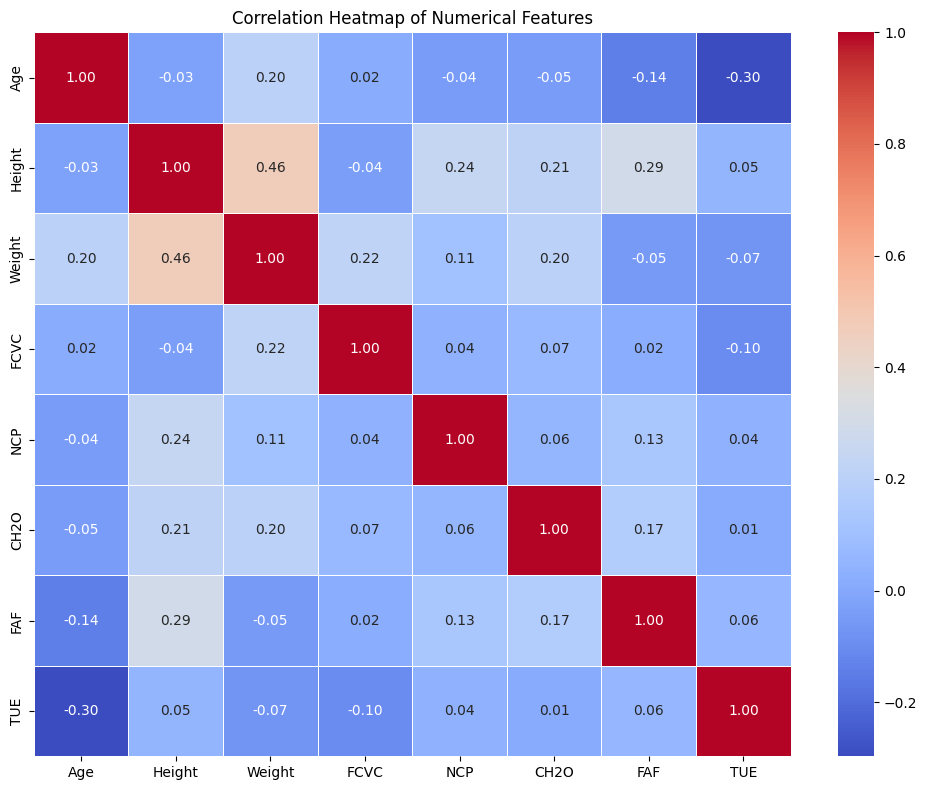

In [19]:
# create a correlation matrix of the dataset
import seaborn as sns
import matplotlib.pyplot as plt

# select only numerical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# make correlation matrix
correlation_matrix = numeric_cols.corr()

# plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


Weight is moderately correlated with Height (r = 0.46) and FCVC (frequency of vegetable consumption) shows a mild positive correlation with Weight (r = 0.22), which may suggest healthier habits associate with better weight control. Overall, correlations are generally weak, suggesting that obesity is influenced by a mix of lifestyle, behavioral, and physical factors rather than any single dominant variable.

In [29]:
# make a box plot of weight by obesity category
fig = px.box(
    data_frame=df,
    x='NObeyesdad',
    y='Weight',
    title='Weight Distribution by Obesity Category',
    labels={'NObeyesdad': 'Obesity Category', 'Weight': 'Weight (kg)'},
    category_orders={"NObeyesdad": ['Obesity_Type_III', 'Obesity_Type_II', 'Obesity_Type_I', 'Overweight_Level_II', 'Overweight_Level_I', 'Normal_Weight', 'Insufficient_Weight']}
)

fig.show()


The weight distribution plot shows a clear trend: individuals in higher obesity categories have higher weight, with wider variability and more outliers. Those in the Normal and Insufficient Weight categories cluster tightly around lower weights.

In [28]:
# make a box plot of height by obesity category
fig = px.box(
    data_frame=df,
    x='NObeyesdad',
    y='Height',
    title='Height Distribution by Obesity Category',
    labels={'NObeyesdad': 'Obesity Category', 'Height': 'Height (meters)'},
    category_orders={"NObeyesdad": ['Obesity_Type_III', 'Obesity_Type_II', 'Obesity_Type_I', 'Overweight_Level_II', 'Overweight_Level_I', 'Normal_Weight', 'Insufficient_Weight']}
)

fig.show()

The height distribution is more uniform across all categories. This reinforces that weight, not height, is the more defining physical feature in determining obesity categories within this dataset.

#### To Conclude:
This exploratory data analysis shows several important insights into the factors associated with obesity. This dataset is well-structured with no missing values and an evenly distributed mix of lifestyle, demographic, and physical features. Our target variable, obesity, has a consistent distribution across the seven categories. Weight distribution by obesity category reveals that individuals in higher obesity classes have higher weights. Obesity appears influenced by multiple lifestyle and behavioral factors, with weak individual correlations. These patterns support the need for a multi-feature classification model to accurately predict obesity levels.